In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Load the dataset
data = pd.read_csv('/content/Wine__Quality.csv')

In [7]:
# Display the first few rows of the dataset
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [8]:
# Check for missing values
print(data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [9]:
# Summary statistics
print(data.describe())


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

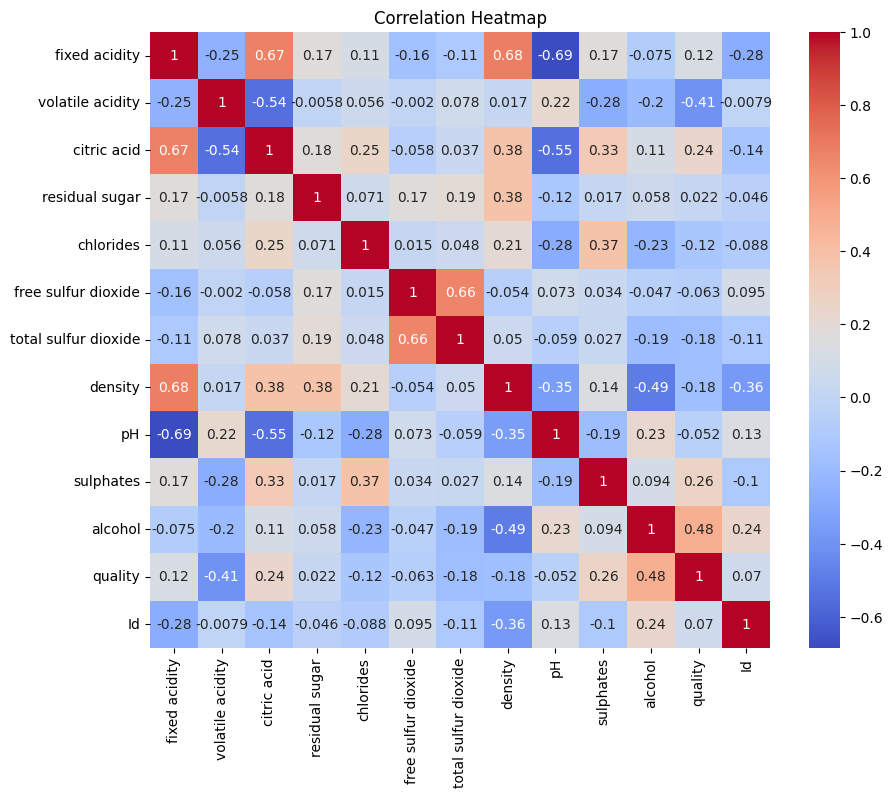

In [11]:
# Correlation heatmap
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

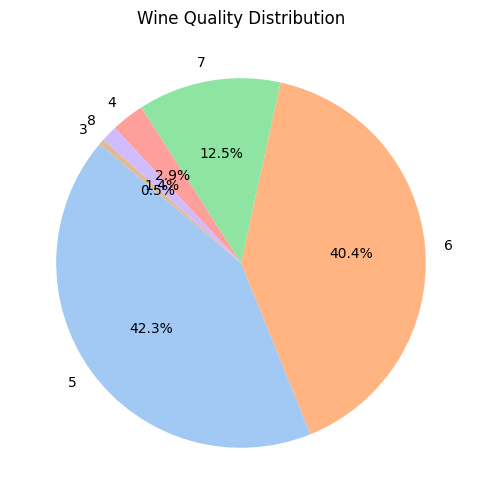

In [12]:
# Pie chart for Wine Quality distribution
quality_distribution = data['quality'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(quality_distribution, labels=quality_distribution.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Wine Quality Distribution')
plt.show()



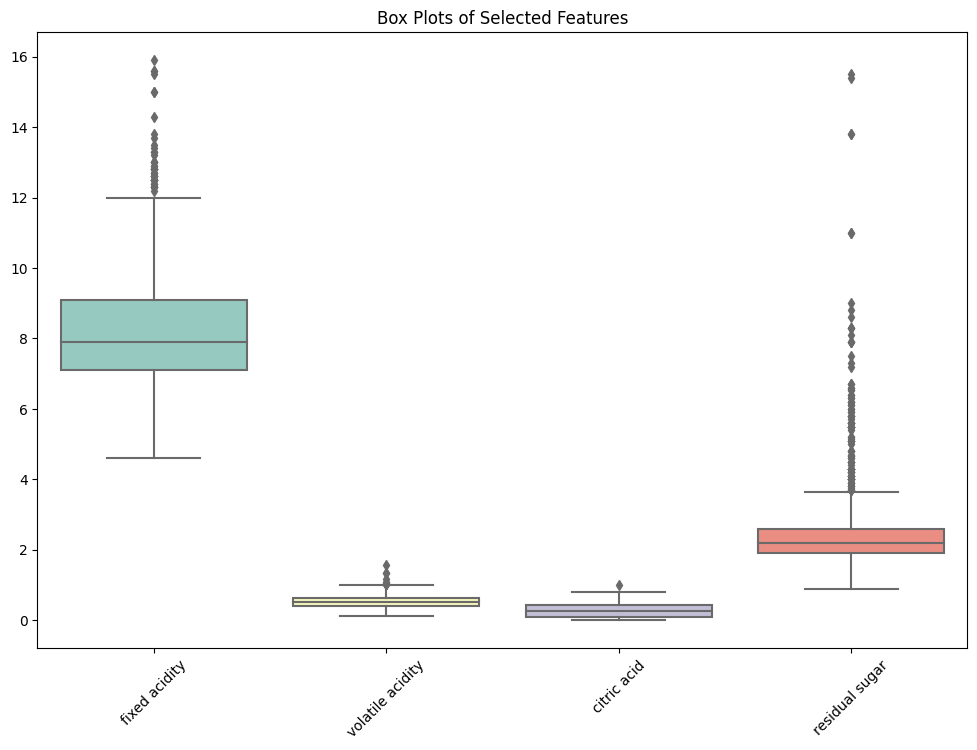

In [13]:
# Box plots for selected features
plt.figure(figsize=(12, 8))
selected_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']
sns.boxplot(data=data[selected_features], palette='Set3')
plt.title('Box Plots of Selected Features')
plt.xticks(rotation=45)
plt.show()

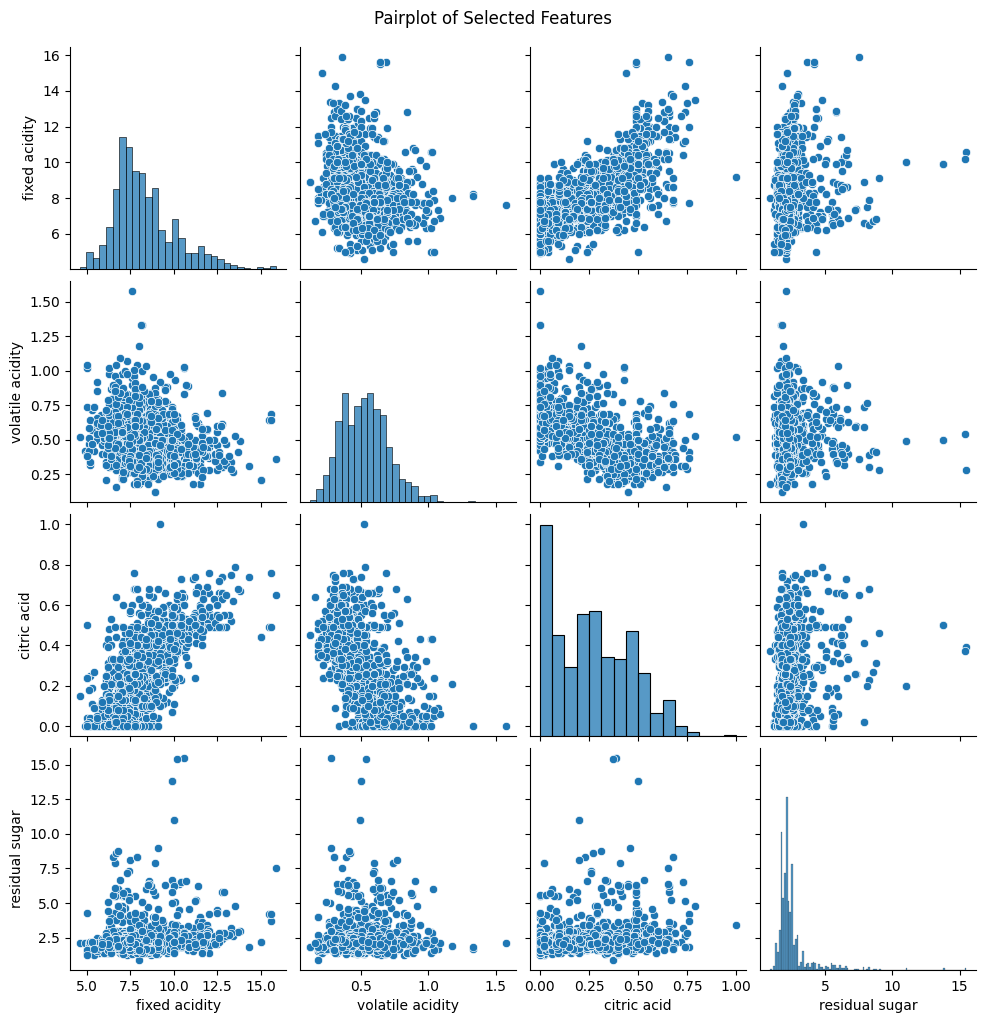

In [15]:
# Pairplot for selected features
sns.pairplot(data[selected_features])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()


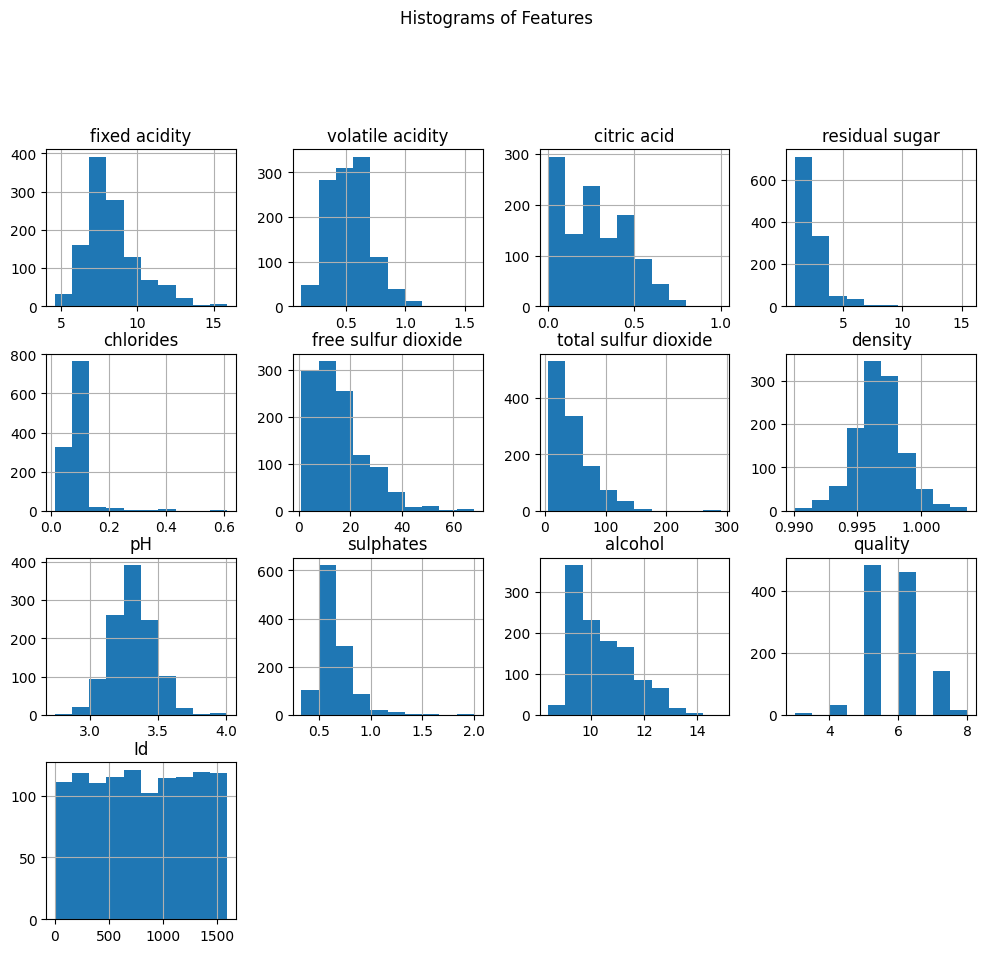

In [16]:
# Distribution of all features using histograms
data.hist(figsize=(12, 10))
plt.suptitle('Histograms of Features', y=1.02)
plt.show()



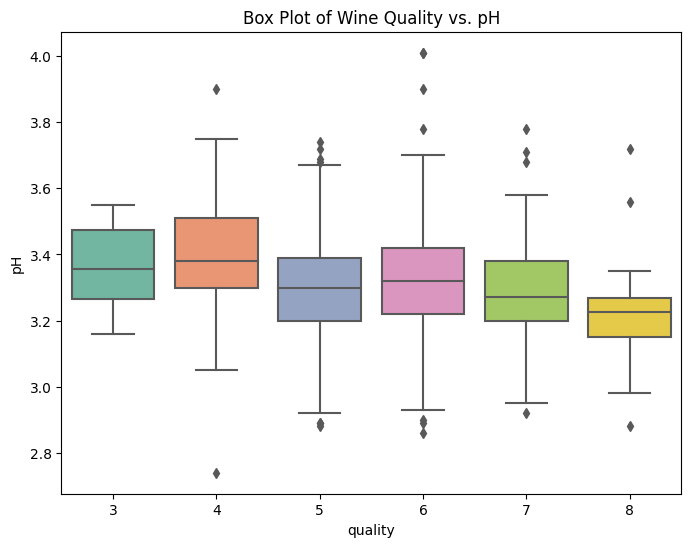

In [17]:
# Box plot for Wine Quality vs. pH
plt.figure(figsize=(8, 6))
sns.boxplot(x='quality', y='pH', data=data, palette='Set2')
plt.title('Box Plot of Wine Quality vs. pH')
plt.show()

# Prediction

In [18]:
X = data.drop(['quality' ,'fixed acidity' , 'volatile acidity' , 'citric acid' , 'residual sugar' ,  'chlorides','free sulfur dioxide','total sulfur dioxide' , 'density','pH','sulphates' , 'Id'] ,axis=1)
X

,alcohol
0,9.4
1,9.8
2,9.8
3,9.8
4,9.4
...,...
1138,11.0
1139,9.5
1140,10.5
1141,11.2


In [19]:
Y = data['quality'].apply(lambda y_value: 1 if y_value>7 else 0)
Y

0       0
1       0
2       0
3       0
4       0
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: quality, Length: 1143, dtype: int64

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state = 3)

In [21]:
Lr = LinearRegression()
Lr.fit(X_train ,Y_train)

LinearRegression()

In [22]:
Lr2 = LinearRegression()
Lr2.fit(X_test,Y_test)

LinearRegression()

In [23]:
Y_train_predict = Lr.predict(X_train)
Y_test_predict = Lr2.predict(X_test)

In [24]:
from sklearn.metrics import mean_squared_error , r2_score
mse_train = mean_squared_error(Y_train , Y_train_predict)
r2_train = r2_score(Y_train , Y_train_predict)
mse_test = mean_squared_error(Y_test , Y_test_predict)
r2_test = r2_score(Y_test , Y_test_predict)

In [25]:
r2_train

0.015719971635927754

In [26]:
r2_test

0.05356674769710279

In [27]:
mse_train

0.009744372280804315

In [28]:
mse_test

0.021559393757463